In [164]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *


In [165]:
traindata = 'E:/AA_Project(Hack)/Train'
testdata = 'E:/AA_Project(Hack)/Test'

cls = ['knife', 'cigarette lighter', 'Ammunition', 
                  'Dry batteries', 'Power Charger']
def checklabel(img):
    label = img.split('.')[0]
    if label[:len(cls[0])] == 'knife' : #knife
        lb = np.array([1, 0, 0, 0, 0])
    elif label[:len(cls[1])] == 'cigarette lighter': #cigarette lighter
        lb = np.array([0, 1, 0, 0, 0])
    elif label[:len(cls[2])] == 'Ammunition': #Ammunition
        lb = np.array([0, 0, 1, 0, 0])
    elif label[:len(cls[3])] == 'Dry batteries': #Dry batteries
        lb = np.array([0, 0, 0, 1, 0])
    elif label[:len(cls[4])] == 'Power Charger': #Power Charger
        lb = np.array([0, 0, 0, 0, 1])
    else:
        lb = np.array([0, 0, 0, 0, 0])
    return lb

def train():
    train_images = []
    for i in tqdm(os.listdir(traindata)):
        path = os.path.join(traindata, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64,64))
        train_images.append([np.array(img), checklabel(i)])
    shuffle(train_images)
    return train_images

def test():
    test_images = []
    for i in tqdm(os.listdir(testdata)):
        path = os.path.join(testdata, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64,64))
        test_images.append([np.array(img), checklabel(i)])
    shuffle(test_images)
    return test_images




In [166]:
training_images = train()
testing_images = test()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 194.07it/s]


In [167]:
model = Sequential()

model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32, kernel_size = 5, strides=1, padding='same', activation= 'swish'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Conv2D(filters=50, kernel_size = 5, strides=1, padding='same', activation= 'swish'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Conv2D(filters=80, kernel_size = 5, strides=1, padding='same', activation= 'swish'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'swish'))
model.add(Dropout(rate=0.5))
model.add(Dense(len(cls), activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=tr_img_data, y=tr_lbl_data, epochs=100, batch_size=100, verbose=0)
model.fit(x=tr_img_data, y=tr_lbl_data, epochs=10, batch_size=100)

model.summary()

Epoch 1/10
2/2 [==============================] - 1s 505ms/step - loss: 0.1205 - accuracy: 0.9613
Epoch 2/10
2/2 [==============================] - 1s 552ms/step - loss: 0.1645 - accuracy: 0.9613
Epoch 3/10
2/2 [==============================] - 1s 517ms/step - loss: 0.1598 - accuracy: 0.9448
Epoch 4/10
2/2 [==============================] - 1s 520ms/step - loss: 0.1087 - accuracy: 0.9669
Epoch 5/10
2/2 [==============================] - 1s 516ms/step - loss: 0.0935 - accuracy: 0.9834
Epoch 6/10
2/2 [==============================] - 1s 508ms/step - loss: 0.1184 - accuracy: 0.9613
Epoch 7/10
2/2 [==============================] - 1s 509ms/step - loss: 0.0761 - accuracy: 0.9724
Epoch 8/10
2/2 [==============================] - 1s 532ms/step - loss: 0.1317 - accuracy: 0.9613
Epoch 9/10
2/2 [==============================] - 1s 511ms/step - loss: 0.0887 - accuracy: 0.9834
Epoch 10/10
2/2 [==============================] - 1s 495ms/step - loss: 0.1379 - accuracy: 0.9558
Model: "sequential_

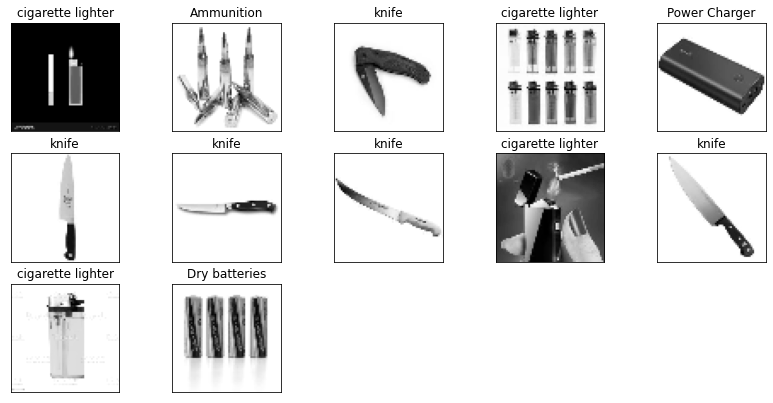

In [168]:
fig = plt.figure(figsize=(14,14))

for cnt, data in enumerate(testing_images):
    y = fig.add_subplot(6,5,cnt+1)
    img = data[0]
    data = img.reshape(1,64,64,1)
    model_out = model.predict([data])

    
    if np.argmax(model_out) ==0:
        str_label='knife'
    elif np.argmax(model_out) ==1:
        str_label = 'cigarette lighter'
    elif np.argmax(model_out) ==2:
        str_label = 'Ammunition'
    elif np.argmax(model_out) ==3:
        str_label = 'Dry batteries'
    elif np.argmax(model_out) ==4:
        str_label = 'Power Charger'
    else:
        str_label = 'To be determined...'
        
    y.imshow(img, 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
